# Project Card Fraud Detection

Dataset : https://www.kaggle.com/datasets/kartik2112/fraud-detection

In [ ]:
import pandas as pd

# Load the datasets
test_data = pd.read_csv('fraudTest.csv')
train_data = pd.read_csv('fraudTrain.csv')
# Display basic information about the training dataset
print("Training Data Info:")
train_data.info()

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14

# Preprocesare

## Data Cleaning

Remove "Unnamed" column
Convert dob to numeric value

In [ ]:
train_data.drop(columns=['Unnamed: 0'], inplace=True)
test_data.drop(columns=['Unnamed: 0'], inplace=True)

train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])
train_data['dob'] = pd.to_datetime(train_data['dob'])

test_data['trans_date_trans_time'] = pd.to_datetime(test_data['trans_date_trans_time'])
test_data['dob'] = pd.to_datetime(test_data['dob'])

Checking and handling missing values

In [ ]:
print(test_data.isnull().sum())

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


Calculate Age from "dob" column

Extract Transaction Time Features

In [ ]:
train_data['age'] = train_data['trans_date_trans_time'].dt.year - train_data['dob'].dt.year
test_data['age'] = test_data['trans_date_trans_time'].dt.year - test_data['dob'].dt.year

train_data['transaction_hour'] = train_data['trans_date_trans_time'].dt.hour
train_data['transaction_day'] = train_data['trans_date_trans_time'].dt.day
train_data['transaction_month'] = train_data['trans_date_trans_time'].dt.month

test_data['transaction_hour'] = test_data['trans_date_trans_time'].dt.hour
test_data['transaction_day'] = test_data['trans_date_trans_time'].dt.day
test_data['transaction_month'] = test_data['trans_date_trans_time'].dt.month



Put job column into job categories

In [ ]:
import pandas as pd

# Sample of the simplified categories and keyword dictionary
category_keywords = {
    'Psychologist, counselling': 'Health & Social Care',
    'Special educational needs teacher': 'Education & Training',
    'Nature conservation officer': 'Engineering & Technology',
    'Patent attorney': 'Business & Management',
    'Dance movement psychotherapist': 'Health & Social Care',
    'Transport planner': 'Engineering & Technology',
    'Arboriculturist': 'Engineering & Technology',
    'Designer, multimedia': 'Arts, Media & Culture',
    'Public affairs consultant': 'Business & Management',
    'Pathologist': 'Health & Social Care',
    'IT trainer': 'Education & Training',
    'Systems developer': 'Engineering & Technology',
    'Engineer, land': 'Engineering & Technology',
    'Systems analyst': 'Engineering & Technology',
    'Naval architect': 'Engineering & Technology',
    'Radiographer, diagnostic': 'Health & Social Care',
    'Programme researcher, broadcasting/film/video': 'Arts, Media & Culture',
    'Energy engineer': 'Engineering & Technology',
    'Event organiser': 'Business & Management',
    'Operational researcher': 'Business & Management',
    'Market researcher': 'Business & Management',
    'Probation officer': 'Health & Social Care',
    'Leisure centre manager': 'Business & Management',
    'Corporate investment banker': 'Business & Management',
    'Therapist, occupational': 'Health & Social Care',
    'Call centre manager': 'Business & Management',
    'Police officer': 'Health & Social Care',
    'Education officer, museum': 'Education & Training',
    'Physiotherapist': 'Health & Social Care',
    'Network engineer': 'Engineering & Technology',
    'Forensic psychologist': 'Health & Social Care',
    'Geochemist': 'Engineering & Technology',
    'Armed forces training and education officer': 'Education & Training',
    'Designer, furniture': 'Arts, Media & Culture',
    'Optician, dispensing': 'Health & Social Care',
    'Psychologist, forensic': 'Health & Social Care',
    'Librarian, public': 'Education & Training',
    'Fine artist': 'Arts, Media & Culture',
    'Scientist, research (maths)': 'Engineering & Technology',
    'Research officer, trade union': 'Business & Management',
    'Tourism officer': 'Business & Management',
    'Human resources officer': 'Business & Management',
    'Surveyor, minerals': 'Engineering & Technology',
    'Applications developer': 'Engineering & Technology',
    'Video editor': 'Arts, Media & Culture',
    'Curator': 'Arts, Media & Culture',
    'Research officer, political party': 'Business & Management',
    'Engineer, mining': 'Engineering & Technology',
    'Education officer, community': 'Education & Training',
    'Physicist, medical': 'Health & Social Care',
    'Amenity horticulturist': 'Engineering & Technology',
    'Electrical engineer': 'Engineering & Technology',
    'Television camera operator': 'Arts, Media & Culture',
    'Higher education careers adviser': 'Education & Training',
    'Ambulance person': 'Health & Social Care',
    'Dealer': 'Business & Management',
    'Paediatric nurse': 'Health & Social Care',
    'Trading standards officer': 'Business & Management',
    'Engineer, technical sales': 'Engineering & Technology',
    'Designer, jewellery': 'Arts, Media & Culture',
    'Clinical biochemist': 'Health & Social Care',
    'Engineer, electronics': 'Engineering & Technology',
    'Water engineer': 'Engineering & Technology',
    'Science writer': 'Arts, Media & Culture',
    'Film/video editor': 'Arts, Media & Culture',
    'Solicitor, Scotland': 'Business & Management',
    'Product/process development scientist': 'Engineering & Technology',
    'Tree surgeon': 'Health & Social Care',
    'Careers information officer': 'Education & Training',
    'Geologist, engineering': 'Engineering & Technology',
    'Counsellor': 'Health & Social Care',
    'Freight forwarder': 'Business & Management',
    'Senior tax professional/tax inspector': 'Business & Management',
    'Engineer, broadcasting (operations)': 'Engineering & Technology',
    'English as a second language teacher': 'Education & Training',
    'Economist': 'Business & Management',
    'Child psychotherapist': 'Health & Social Care',
    'Claims inspector/assessor': 'Business & Management',
    'Tourist information centre manager': 'Business & Management',
    'Exhibitions officer, museum/gallery': 'Arts, Media & Culture',
    'Location manager': 'Business & Management',
    'Engineer, biomedical': 'Engineering & Technology',
    'Research scientist (physical sciences)': 'Engineering & Technology',
    'Purchasing manager': 'Business & Management',
    'Editor, magazine features': 'Arts, Media & Culture',
    'Operations geologist': 'Engineering & Technology',
    'Interpreter': 'Education & Training',
    'Engineering geologist': 'Engineering & Technology',
    'Agricultural consultant': 'Business & Management',
    'Paramedic': 'Health & Social Care',
    'Financial adviser': 'Business & Management',
    'Administrator, education': 'Education & Training',
    'Educational psychologist': 'Health & Social Care',
    'Financial trader': 'Business & Management',
    'Audiological scientist': 'Health & Social Care',
    'Administrator, charities/voluntary organisations': 'Business & Management',
    'Health service manager': 'Health & Social Care',
    'Retail merchandiser': 'Business & Management',
    'Telecommunications researcher': 'Engineering & Technology',
    'Exercise physiologist': 'Health & Social Care',
    'Accounting technician': 'Business & Management',
    'Product designer': 'Arts, Media & Culture',
    'Waste management officer': 'Engineering & Technology',
    'Mining engineer': 'Engineering & Technology',
    'Surgeon': 'Health & Social Care',
    'Therapist, horticultural': 'Health & Social Care',
    'Environmental consultant': 'Engineering & Technology',
    'Broadcast presenter': 'Arts, Media & Culture',
    'Producer, radio': 'Arts, Media & Culture',
    'Engineer, communications': 'Engineering & Technology',
    'Historic buildings inspector/conservation officer': 'Engineering & Technology',
    'Teacher, English as a foreign language': 'Education & Training',
    'Materials engineer': 'Engineering & Technology',
    'Health visitor': 'Health & Social Care',
    'Medical secretary': 'Health & Social Care',
    'Theatre director': 'Arts, Media & Culture',
    'Technical brewer': 'Engineering & Technology',
    'Land/geomatics surveyor': 'Engineering & Technology',
    'Engineer, structural': 'Engineering & Technology',
    'Diagnostic radiographer': 'Health & Social Care',
    'Television production assistant': 'Arts, Media & Culture',
    'Medical sales representative': 'Health & Social Care',
    'Building control surveyor': 'Engineering & Technology',
    'Therapist, sports': 'Health & Social Care',
    'Structural engineer': 'Engineering & Technology',
    'Commercial/residential surveyor': 'Engineering & Technology',
    'Database administrator': 'Engineering & Technology',
    'Exhibition designer': 'Arts, Media & Culture',
    'Training and development officer': 'Business & Management',
    'Mechanical engineer': 'Engineering & Technology',
    'Medical physicist': 'Health & Social Care',
    'Administrator': 'Business & Management',
    'Mudlogger': 'Engineering & Technology',
    'Fisheries officer': 'Engineering & Technology',
    'Conservator, museum/gallery': 'Arts, Media & Culture',
    'Programmer, multimedia': 'Engineering & Technology',
    'Cytogeneticist': 'Health & Social Care',
    'Multimedia programmer': 'Engineering & Technology',
    'Counselling psychologist': 'Health & Social Care',
    'Chiropodist': 'Health & Social Care',
    'Teacher, early years/pre': 'Education & Training',
    'Cartographer': 'Engineering & Technology',
    'Pensions consultant': 'Business & Management',
    'Primary school teacher': 'Education & Training',
    'Electronics engineer': 'Engineering & Technology',
    'Museum/gallery exhibitions officer': 'Arts, Media & Culture',
    'Air broker': 'Business & Management',
    'Chemical engineer': 'Engineering & Technology',
    'Advertising account executive': 'Business & Management',
    'Advertising account planner': 'Business & Management',
    'Chartered legal executive (England and Wales)': 'Business & Management',
    'Psychiatric nurse': 'Health & Social Care',
    'Secondary school teacher': 'Education & Training',
    'Librarian, academic': 'Education & Training',
    'Embryologist, clinical': 'Health & Social Care',
    'Immunologist': 'Health & Social Care',
    'Television floor manager': 'Arts, Media & Culture',
    'Contractor': 'Business & Management',
    'Health physicist': 'Health & Social Care',
    'Copywriter': 'Arts, Media & Culture',
    'Bookseller': 'Business & Management',
    'Land agent': 'Business & Management',
    'Chartered loss adjuster': 'Business & Management',
    'Occupational psychologist': 'Health & Social Care',
    'Facilities manager': 'Business & Management',
    'Further education lecturer': 'Education & Training',
    'Archivist': 'Arts, Media & Culture',
    'Investment analyst': 'Business & Management',
    'Engineer, building services': 'Engineering & Technology',
    'Psychologist, sport and exercise': 'Health & Social Care',
    'Journalist, newspaper': 'Arts, Media & Culture',
    'Doctor, hospital': 'Health & Social Care',
    'Phytotherapist': 'Health & Social Care',
    'Pharmacologist': 'Health & Social Care',
    'Horticultural therapist': 'Health & Social Care',
    'Hydrologist': 'Engineering & Technology',
    'Community arts worker': 'Arts, Media & Culture',
    'Public house manager': 'Business & Management',
    'Architect': 'Engineering & Technology',
    'Lexicographer': 'Arts, Media & Culture',
    'Psychotherapist, child': 'Health & Social Care',
    'Teacher, secondary school': 'Education & Training',
    'Toxicologist': 'Health & Social Care',
    'Commercial horticulturist': 'Engineering & Technology',
    'Podiatrist': 'Health & Social Care',
    'Building surveyor': 'Engineering & Technology',
    'Architectural technologist': 'Engineering & Technology',
    'Editor, film/video': 'Arts, Media & Culture',
    'Social researcher': 'Education & Training',
    'Wellsite geologist': 'Engineering & Technology',
    'Minerals surveyor': 'Engineering & Technology',
    'Designer, ceramics/pottery': 'Arts, Media & Culture',
    'Mental health nurse': 'Health & Social Care',
    'Volunteer coordinator': 'Business & Management',
    'Chief Technology Officer': 'Business & Management',
    'Camera operator': 'Arts, Media & Culture',
    'Copywriter, advertising': 'Arts, Media & Culture',
    'Surveyor, mining': 'Engineering & Technology',
    'Product manager': 'Business & Management',
    "Nurse, children's": 'Health & Social Care',
    'Pension scheme manager': 'Business & Management',
    'Archaeologist': 'Arts, Media & Culture',
    'Sub': 'Arts, Media & Culture',
    'Designer, interior/spatial': 'Arts, Media & Culture',
    'Futures trader': 'Business & Management',
    'Chief Financial Officer': 'Business & Management',
    'Museum education officer': 'Education & Training',
    'Quantity surveyor': 'Engineering & Technology',
    'Physiological scientist': 'Health & Social Care',
    'Loss adjuster, chartered': 'Business & Management',
    'Pilot, airline': 'Engineering & Technology',
    'Production assistant, radio': 'Arts, Media & Culture',
    'Immigration officer': 'Business & Management',
    'Retail banker': 'Business & Management',
    'Health and safety adviser': 'Health & Social Care',
    'Teacher, special educational needs': 'Education & Training',
    'Jewellery designer': 'Arts, Media & Culture',
    'Community pharmacist': 'Health & Social Care',
    'Control and instrumentation engineer': 'Engineering & Technology',
    'Make-up artist': 'Arts, Media & Culture',
    'Early years teacher': 'Education & Training',
    'Sales professional, IT': 'Business & Management',
    'Scientist, marine': 'Engineering & Technology',
    'Intelligence analyst': 'Engineering & Technology',
    'Clinical research associate': 'Health & Social Care',
    'Administrator, local government': 'Business & Management',
    'Barrister': 'Business & Management',
    'Engineer, control and instrumentation': 'Engineering & Technology',
    'Clothing/textile technologist': 'Engineering & Technology',
    'Development worker, community': 'Education & Training',
    'Art therapist': 'Health & Social Care',
    'Sales executive': 'Business & Management',
    'Armed forces logistics/support/administrative officer': 'Business & Management',
    'Optometrist': 'Health & Social Care',
    'Insurance underwriter': 'Business & Management',
    'Charity officer': 'Business & Management',
    'Civil Service fast streamer': 'Business & Management',
    'Retail buyer': 'Business & Management',
    'Magazine features editor': 'Arts, Media & Culture',
    'Equities trader': 'Business & Management',
    'Trade mark attorney': 'Business & Management',
    'Research scientist (life sciences)': 'Engineering & Technology',
    'Psychotherapist': 'Health & Social Care',
    'Pharmacist, community': 'Health & Social Care',
    'Risk analyst': 'Business & Management',
    'Engineer, maintenance': 'Engineering & Technology',
    'Logistics and distribution manager': 'Business & Management',
    'Water quality scientist': 'Engineering & Technology',
    'Lecturer, further education': 'Education & Training',
    'Production assistant, television': 'Arts, Media & Culture',
    'Tour manager': 'Business & Management',
    'Music therapist': 'Health & Social Care',
    'Surveyor, land/geomatics': 'Engineering & Technology',
    'Engineer, production': 'Engineering & Technology',
    'Acupuncturist': 'Health & Social Care',
    'Hospital doctor': 'Health & Social Care',
    'Teacher, primary school': 'Education & Training',
    'Accountant, chartered public finance': 'Business & Management',
    'Illustrator': 'Arts, Media & Culture',
    'Scientist, physiological': 'Engineering & Technology',
    'Buyer, industrial': 'Business & Management',
    'Scientist, research (physical sciences)': 'Engineering & Technology',
    'Radio producer': 'Arts, Media & Culture',
    'Manufacturing engineer': 'Engineering & Technology',
    'Animal technologist': 'Health & Social Care',
    'Production engineer': 'Engineering & Technology',
    'Biochemist, clinical': 'Health & Social Care',
    'Engineer, manufacturing': 'Engineering & Technology',
    'Comptroller': 'Business & Management',
    'General practice doctor': 'Health & Social Care',
    'Designer, industrial/product': 'Arts, Media & Culture',
    'Prison officer': 'Business & Management',
    'Merchandiser, retail': 'Business & Management',
    'Engineer, drilling': 'Engineering & Technology',
    'Engineer, petroleum': 'Engineering & Technology',
    'Cabin crew': 'Business & Management',
    'Commissioning editor': 'Arts, Media & Culture',
    'Accountant, chartered certified': 'Business & Management',
    'Local government officer': 'Business & Management',
    'Professor Emeritus': 'Education & Training',
    'Press sub': 'Arts, Media & Culture',
    'Chartered public finance accountant': 'Business & Management',
    'Writer': 'Arts, Media & Culture',
    'Chief Executive Officer': 'Business & Management',
    'Occupational hygienist': 'Health & Social Care',
    'Doctor, general practice': 'Health & Social Care',
    'Community education officer': 'Education & Training',
    'Landscape architect': 'Engineering & Technology',
    'Occupational therapist': 'Health & Social Care',
    'Special effects artist': 'Arts, Media & Culture',
    'Civil engineer, contracting': 'Engineering & Technology',
    "Barrister's clerk": 'Business & Management',
    'Travel agency manager': 'Business & Management',
    'Associate Professor': 'Education & Training',
    'Neurosurgeon': 'Health & Social Care',
    'Plant breeder/geneticist': 'Engineering & Technology',
    'Radio broadcast assistant': 'Arts, Media & Culture',
    'Field seismologist': 'Engineering & Technology',
    'Industrial/product designer': 'Engineering & Technology',
    'Metallurgist': 'Engineering & Technology',
    "Politician's assistant": 'Business & Management',
    'Insurance claims handler': 'Business & Management',
    'Theme park manager': 'Business & Management',
    'Gaffer': 'Arts, Media & Culture',
    'Chief Strategy Officer': 'Business & Management',
    'Heritage manager': 'Arts, Media & Culture',
    'Ceramics designer': 'Arts, Media & Culture',
    'Animator': 'Arts, Media & Culture',
    'Oceanographer': 'Engineering & Technology',
    'Colour technologist': 'Engineering & Technology',
    'Engineer, agricultural': 'Engineering & Technology',
    'Therapist, drama': 'Health & Social Care',
    'Orthoptist': 'Health & Social Care',
    'Learning mentor': 'Education & Training',
    'Arts development officer': 'Arts, Media & Culture',
    'Biomedical engineer': 'Engineering & Technology',
    'Race relations officer': 'Health & Social Care',
    'Therapist, music': 'Health & Social Care',
    'Retail manager': 'Business & Management',
    'Furniture designer': 'Arts, Media & Culture',
    'Building services engineer': 'Engineering & Technology',
    'Maintenance engineer': 'Engineering & Technology',
    'Aid worker': 'Education & Training',
    'Editor, commissioning': 'Arts, Media & Culture',
    'Private music teacher': 'Education & Training',
    'Scientist, biomedical': 'Engineering & Technology',
    'Public relations account executive': 'Business & Management',
    'Dispensing optician': 'Health & Social Care',
    'Advice worker': 'Health & Social Care',
    'Hydrographic surveyor': 'Engineering & Technology',
    'Geoscientist': 'Engineering & Technology',
    'Environmental health practitioner': 'Health & Social Care',
    'Learning disability nurse': 'Health & Social Care',
    'Chief Operating Officer': 'Business & Management',
    'Scientific laboratory technician': 'Engineering & Technology',
    'Records manager': 'Business & Management',
    'Barista': 'Business & Management',
    'Marketing executive': 'Business & Management',
    'Tax inspector': 'Business & Management',
    'Musician': 'Arts, Media & Culture',
    'Therapist, art': 'Health & Social Care',
    'Engineer, automotive': 'Engineering & Technology',
    'Clinical psychologist': 'Health & Social Care',
    'Warden/ranger': 'Engineering & Technology',
    'Surveyor, rural practice': 'Engineering & Technology',
    'Sport and exercise psychologist': 'Health & Social Care',
    'Education administrator': 'Education & Training',
    'Chief of Staff': 'Business & Management',
    'Nurse, mental health': 'Health & Social Care',
    'Music tutor': 'Education & Training',
    'Planning and development surveyor': 'Engineering & Technology',
    'Teaching laboratory technician': 'Education & Training',
    'Chief Marketing Officer': 'Business & Management',
    'Theatre manager': 'Arts, Media & Culture',
    'Quarry manager': 'Engineering & Technology',
    'Interior and spatial designer': 'Arts, Media & Culture',
    'Lecturer, higher education': 'Education & Training',
    'Regulatory affairs officer': 'Business & Management',
    'Secretary/administrator': 'Business & Management',
    'Chemist, analytical': 'Engineering & Technology',
    'Designer, exhibition/display': 'Arts, Media & Culture',
    'Pharmacist, hospital': 'Health & Social Care',
    'Site engineer': 'Engineering & Technology',
    'Equality and diversity officer': 'Health & Social Care',
    'Public librarian': 'Education & Training',
    'Town planner': 'Engineering & Technology',
    'Chartered accountant': 'Business & Management',
    'Programmer, applications': 'Engineering & Technology',
    'Manufacturing systems engineer': 'Engineering & Technology',
    'Web designer': 'Engineering & Technology',
    'Community development worker': 'Education & Training',
    'Animal nutritionist': 'Health & Social Care',
    'Petroleum engineer': 'Engineering & Technology',
    'Information systems manager': 'Engineering & Technology',
    'Press photographer': 'Arts, Media & Culture',
    'Insurance risk surveyor': 'Engineering & Technology',
    'Soil scientist': 'Engineering & Technology',
    'Buyer, retail': 'Business & Management',
    'Public relations officer': 'Business & Management',
    'Health promotion specialist': 'Health & Social Care',
    'Psychiatrist': 'Health & Social Care',
    'Visual merchandiser': 'Business & Management',
    'Rural practice surveyor': 'Engineering & Technology',
    'Hotel manager': 'Business & Management',
    'Communications engineer': 'Engineering & Technology',
    'Insurance broker': 'Business & Management',
    'Radiographer, therapeutic': 'Health & Social Care',
    'Set designer': 'Arts, Media & Culture',
    'Tax adviser': 'Business & Management',
    'Drilling engineer': 'Engineering & Technology',
    'Fitness centre manager': 'Business & Management',
    'Farm manager': 'Engineering & Technology',
    'Management consultant': 'Business & Management',
    'Energy manager': 'Engineering & Technology',
    'Museum/gallery conservator': 'Arts, Media & Culture',
    'Herbalist': 'Health & Social Care',
    'Osteopath': 'Health & Social Care',
    'Statistician': 'Engineering & Technology',
    'Hospital pharmacist': 'Health & Social Care',
    'Estate manager/land agent': 'Business & Management',
    'Sports development officer': 'Business & Management',
    'Investment banker, corporate': 'Business & Management',
    'Biomedical scientist': 'Engineering & Technology',
    'Television/film/video producer': 'Arts, Media & Culture',
    'Nutritional therapist': 'Health & Social Care',
    'Company secretary': 'Business & Management',
    'Production manager': 'Engineering & Technology',
    'Magazine journalist': 'Arts, Media & Culture',
    'Media buyer': 'Business & Management',
    'Data scientist': 'Engineering & Technology',
    'Engineer, civil (contracting)': 'Engineering & Technology',
    'Herpetologist': 'Engineering & Technology',
    'Garment/textile technologist': 'Engineering & Technology',
    'Scientist, research (medical)': 'Health & Social Care',
    'Civil Service administrator': 'Business & Management',
    'Airline pilot': 'Engineering & Technology',
    'Textile designer': 'Arts, Media & Culture',
    'Environmental manager': 'Engineering & Technology',
    'Furniture conservator/restorer': 'Arts, Media & Culture',
    'Horticultural consultant': 'Engineering & Technology',
    'Firefighter': 'Health & Social Care',
    'Geophysicist/field seismologist': 'Engineering & Technology',
    'Psychologist, clinical': 'Health & Social Care',
    'Development worker, international aid': 'Education & Training',
    'Sports administrator': 'Business & Management',
    'IT consultant': 'Engineering & Technology',
    'Presenter, broadcasting': 'Arts, Media & Culture',
    'Outdoor activities/education manager': 'Education & Training',
    'Field trials officer': 'Engineering & Technology',
    'Social research officer, government': 'Education & Training',
    'English as a foreign language teacher': 'Education & Training',
    'Restaurant manager, fast food': 'Business & Management',
    'Hydrogeologist': 'Engineering & Technology',
    'Research scientist (medical)': 'Health & Social Care',
    'Designer, television/film set': 'Arts, Media & Culture',
    'Geneticist, molecular': 'Health & Social Care',
    'Designer, textile': 'Arts, Media & Culture',
    'Licensed conveyancer': 'Business & Management',
    'Emergency planning/management officer': 'Business & Management',
    'Geologist, wellsite': 'Engineering & Technology',
    'Air cabin crew': 'Business & Management',
    'Seismic interpreter': 'Engineering & Technology',
    'Surveyor, hydrographic': 'Engineering & Technology',
    'Charity fundraiser': 'Business & Management',
    'Stage manager': 'Arts, Media & Culture',
    'Aeronautical engineer': 'Engineering & Technology',
    'Glass blower/designer': 'Arts, Media & Culture',
    'Ecologist': 'Engineering & Technology',
    'Horticulturist, commercial': 'Engineering & Technology',
    'Research scientist (maths)': 'Engineering & Technology',
    'Engineer, aeronautical': 'Engineering & Technology',
    'Conservation officer, historic buildings': 'Engineering & Technology',
    'Art gallery manager': 'Arts, Media & Culture',
    'Advertising copywriter': 'Arts, Media & Culture',
    'Engineer, civil (consulting)': 'Engineering & Technology',
    'Oncologist': 'Health & Social Care',
    'Engineer, materials': 'Engineering & Technology',
    'Scientist, clinical (histocompatibility and immunogenetics)': 'Health & Social Care',
    'Investment banker, operational': 'Business & Management',
    'Medical technical officer': 'Health & Social Care',
    'Academic librarian': 'Education & Training',
    'Artist': 'Arts, Media & Culture',
    'Clinical cytogeneticist': 'Health & Social Care',
    'TEFL teacher': 'Education & Training',
    'Administrator, arts': 'Arts, Media & Culture',
    'Teacher, adult education': 'Education & Training',
    'Catering manager': 'Business & Management',
    'Environmental education officer': 'Education & Training',
    'Conservator, furniture': 'Arts, Media & Culture',
    'Analytical chemist': 'Engineering & Technology',
    'Broadcast engineer': 'Engineering & Technology',
    'Media planner': 'Business & Management',
    'Lawyer': 'Business & Management',
    'Producer, television/film/video': 'Arts, Media & Culture',
    'Armed forces technical officer': 'Engineering & Technology',
    'Engineer, site': 'Engineering & Technology',
    'Contracting civil engineer': 'Engineering & Technology',
    'Veterinary surgeon': 'Health & Social Care',
    'Sales promotion account executive': 'Business & Management',
    'Broadcast journalist': 'Arts, Media & Culture',
    'Dancer': 'Arts, Media & Culture',
    'Forest/woodland manager': 'Engineering & Technology',
    'Personnel officer': 'Business & Management',
    'Industrial buyer': 'Business & Management',
    'Accountant, chartered': 'Business & Management',
    'Air traffic controller': 'Engineering & Technology',
    'Careers adviser': 'Education & Training',
    'Information officer': 'Education & Training',
    'Ship broker': 'Business & Management',
    'Legal secretary': 'Business & Management',
    'Homeopath': 'Health & Social Care',
    'Solicitor': 'Business & Management',
    'Warehouse manager': 'Business & Management'
}

# Function to categorize based on keywords
def categorize_job(job_title):
    # Lookup the job title in the job_to_category dictionary; if not found, default to "Other"
    return category_keywords.get(job_title, "Other")

# Apply the function to create a new "category" column in the dataframe
train_data['job_category'] = train_data['job'].apply(categorize_job)
test_data['job_category'] = test_data['job'].apply(categorize_job)


Create column distance based on lat, long and merch_lat, merch_long

In [ ]:
import numpy as np

# Function to calculate distance using the Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r

# Drop rows with missing coordinates
train_data = train_data.dropna(subset=['lat', 'long', 'merch_lat', 'merch_long'])
test_data = test_data.dropna(subset=['lat', 'long', 'merch_lat', 'merch_long'])

# Calculate distances for train data
train_data['transaction_distance'] = haversine(
    train_data['lat'], train_data['long'], train_data['merch_lat'], train_data['merch_long']
)

# Calculate distances for test data
test_data['transaction_distance'] = haversine(
    test_data['lat'], test_data['long'], test_data['merch_lat'], test_data['merch_long']
)

# Display a sample
print(train_data[['lat', 'long', 'merch_lat', 'merch_long', 'transaction_distance']].head())



       lat      long  merch_lat  merch_long  transaction_distance
0  36.0788  -81.1781  36.011293  -82.048315             78.597568
1  48.8878 -118.2105  49.159047 -118.186462             30.212176
2  42.1808 -112.2620  43.150704 -112.154481            108.206083
3  46.2306 -112.1138  47.034331 -112.561071             95.673231
4  38.4207  -79.4629  38.674999  -78.632459             77.556744


# EDA

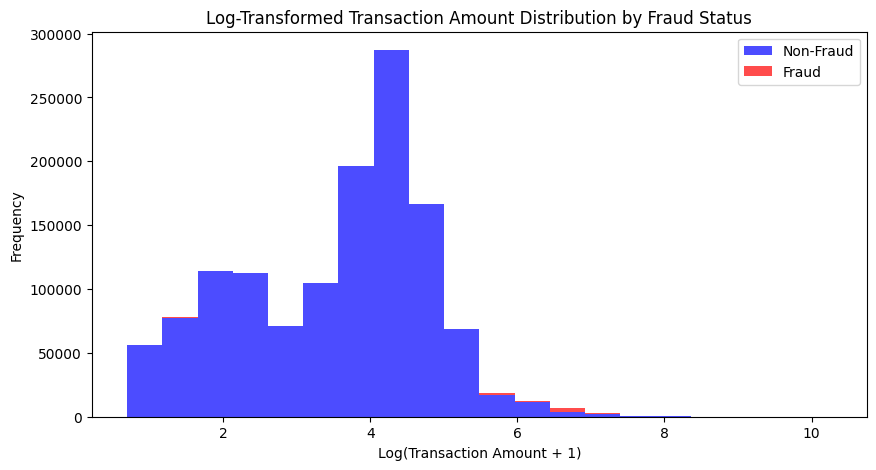

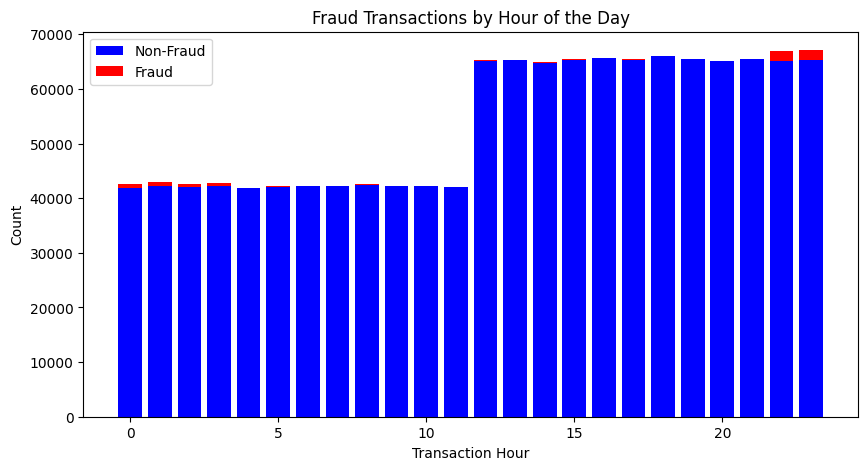

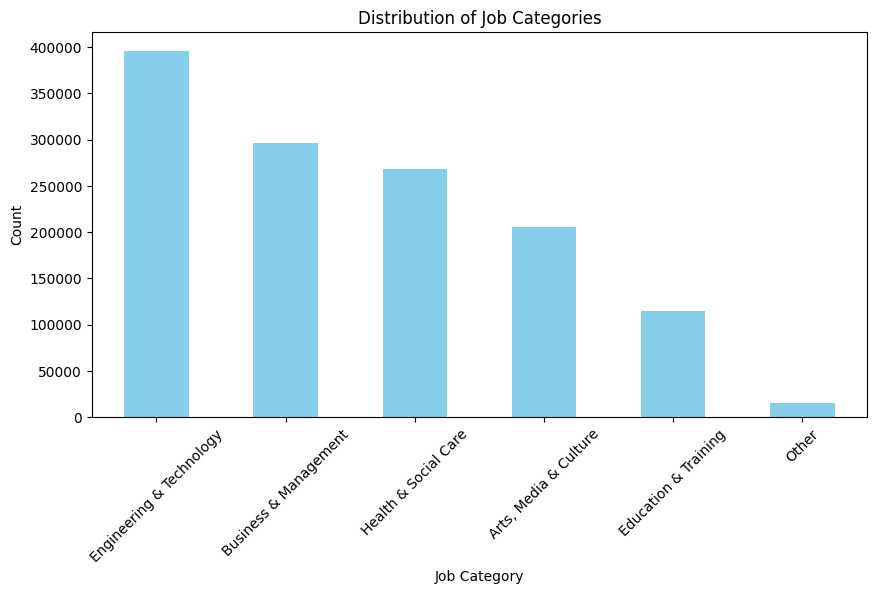

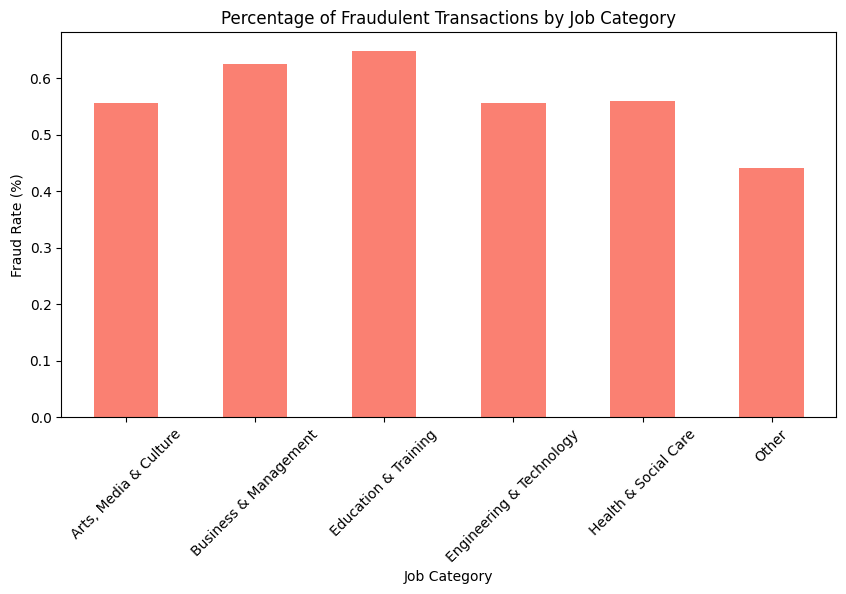

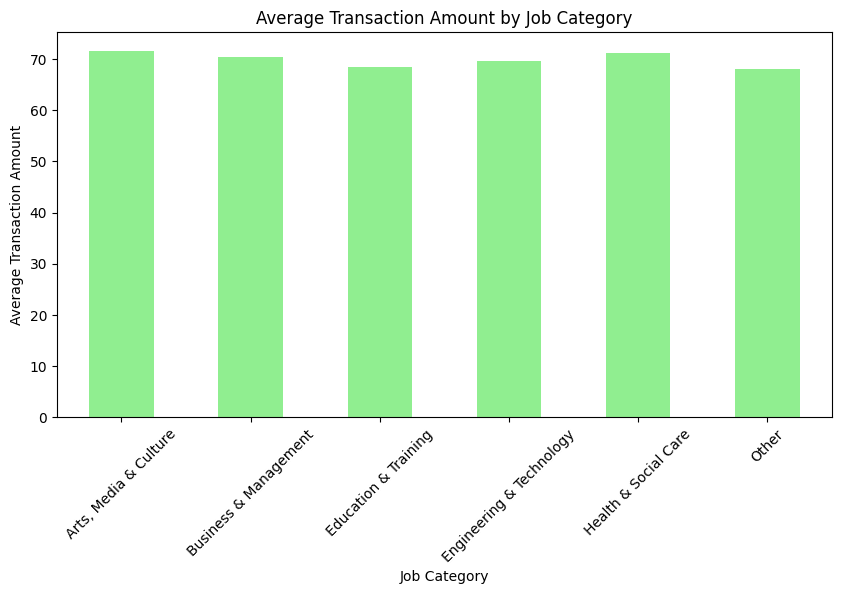

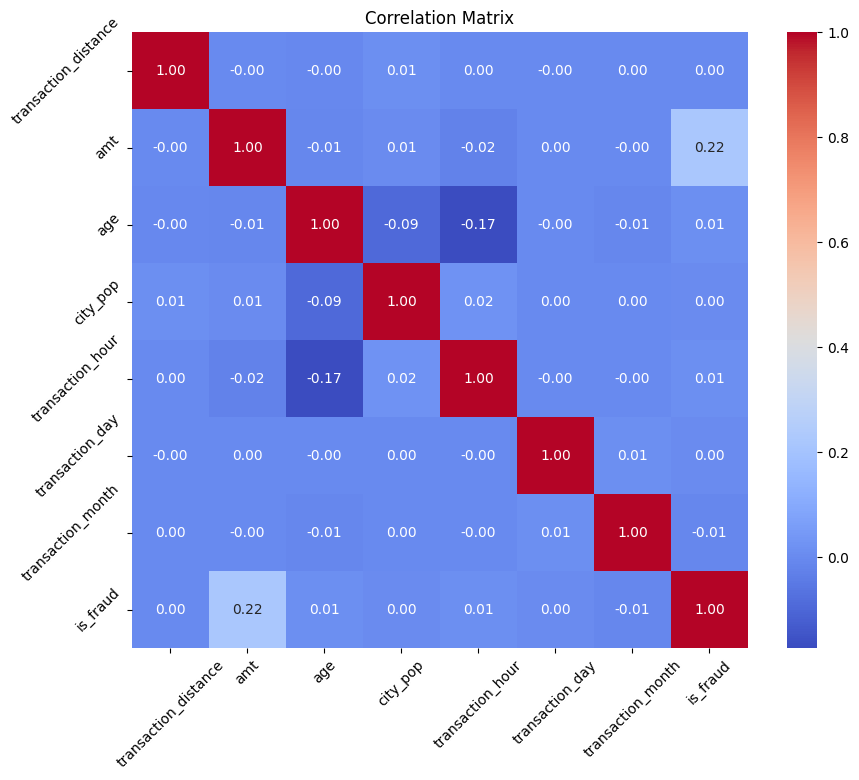

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Apply log transformation to 'amt' to compress the range
train_data['log_amt'] = np.log1p(train_data['amt'])  # log1p is log(1 + amt), useful for values close to zero

# Plot the Log-Transformed Transaction Amount by Fraud Status
plt.figure(figsize=(10, 5))
plt.hist([train_data[train_data['is_fraud'] == 0]['log_amt'], train_data[train_data['is_fraud'] == 1]['log_amt']],
         bins=20, label=['Non-Fraud', 'Fraud'], stacked=True, color=['blue', 'red'], alpha=0.7)
plt.title("Log-Transformed Transaction Amount Distribution by Fraud Status")
plt.xlabel("Log(Transaction Amount + 1)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Plot 2: Fraud Transactions by Hour of the Day
plt.figure(figsize=(10, 5))
fraud_by_hour = train_data.groupby(['transaction_hour', 'is_fraud']).size().unstack(fill_value=0)
plt.bar(fraud_by_hour.index, fraud_by_hour[0], color='blue', label='Non-Fraud')
plt.bar(fraud_by_hour.index, fraud_by_hour[1], bottom=fraud_by_hour[0], color='red', label='Fraud')
plt.title("Fraud Transactions by Hour of the Day")
plt.xlabel("Transaction Hour")
plt.ylabel("Count")
plt.legend()
plt.show()

# 1. Distribution of Job Categories
plt.figure(figsize=(10, 5))
train_data['job_category'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Job Categories")
plt.xlabel("Job Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Count fraudulent and total transactions in each job category
fraud_counts = train_data[train_data['is_fraud'] == 1].groupby('job_category').size()
total_counts = train_data.groupby('job_category').size()

# Calculate fraud rate as a percentage (fraud count / total count) * 100
fraud_rate_by_category = (fraud_counts / total_counts) * 100

# Replace NaN with 0 for categories with no fraud transactions
fraud_rate_by_category = fraud_rate_by_category.fillna(0)

# Plot the fraud rate by job category with clearer labels
plt.figure(figsize=(10, 5))
fraud_rate_by_category.plot(kind='bar', color='salmon')
plt.title("Percentage of Fraudulent Transactions by Job Category")
plt.xlabel("Job Category")
plt.ylabel("Fraud Rate (%)")  # Indicate that it's a percentage
plt.xticks(rotation=45)
plt.show()

# 3. Job Category vs. Average Transaction Amount
plt.figure(figsize=(10, 5))
avg_amount_by_category = train_data.groupby('job_category')['amt'].mean()
avg_amount_by_category.plot(kind='bar', color='lightgreen')
plt.title("Average Transaction Amount by Job Category")
plt.xlabel("Job Category")
plt.ylabel("Average Transaction Amount")
plt.xticks(rotation=45)
plt.show()


# Select relevant numerical columns, including 'transaction_distance'
numerical_features = ['transaction_distance', 'amt', 'age', 'city_pop', 'transaction_hour',
                      'transaction_day', 'transaction_month', 'is_fraud']

# Compute the correlation matrix
correlation_matrix = train_data[numerical_features].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()



Encoding categorical variables

In [ ]:
train_data = pd.get_dummies(train_data, columns=[ 'gender'])
test_data = pd.get_dummies(test_data, columns=['gender'])

train_data = pd.get_dummies(train_data, columns=['job_category'], prefix='job_cat')
test_data = pd.get_dummies(test_data, columns=['job_category'], prefix='job_cat')

train_data, test_data = train_data.align(test_data, join='left', axis=1, fill_value=0)


Scaling for numerical features

In [ ]:
from sklearn.preprocessing import MinMaxScaler

num_columns = ['amt', 'age', 'city_pop', 'transaction_hour','transaction_day', 'transaction_month','transaction_distance','lat','long','merch_lat', 'merch_long']

scaler = MinMaxScaler()

train_data[num_columns] = scaler.fit_transform(train_data[num_columns])
test_data[num_columns] = scaler.transform(test_data[num_columns])


In [ ]:
print(train_data.head())

# Logistic regression for Class Imbalance (using weight)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
import numpy as np

print("\nTarget variable distribution:")
print(train_data['is_fraud'].value_counts(normalize=True))

# Prepare data
X = train_data.drop(columns=['is_fraud', 'merchant', 'trans_date_trans_time', 'category', 'first', 'last',
                             'street', 'city', 'state', 'zip', 'job', 'unix_time', 'trans_num', 'dob','lat', 'long', 'merch_lat', 'merch_long',
                             'cc_num'])
y = train_data['is_fraud']

# Define the model
model = LogisticRegression(class_weight='balanced', random_state=42)

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_results = cross_validate(model, X, y, cv=cv, scoring=['accuracy', 'roc_auc'], return_train_score=True)

# Print cross-validation results
print("\nCross-Validation Results:")
print(f"Accuracy: {np.mean(cv_results['test_accuracy']):.4f} ± {np.std(cv_results['test_accuracy']):.4f}")
print(f"ROC-AUC: {np.mean(cv_results['test_roc_auc']):.4f} ± {np.std(cv_results['test_roc_auc']):.4f}")

# Train on the entire training set and evaluate on the test set
model.fit(X, y)

X_test = test_data.drop(columns=['is_fraud', 'merchant', 'trans_date_trans_time', 'category', 'first', 'last',
                                 'street', 'city', 'state', 'zip', 'job', 'unix_time', 'trans_num', 'dob','lat', 'long', 'merch_lat', 'merch_long',
                                  'cc_num'])
y_test = test_data['is_fraud']

y_pred_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for fraud
threshold = 0.90  # Increase for higher precision
y_pred = (y_pred_probs > threshold).astype(int)

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_probs)
print(f"ROC-AUC Score on Test Data: {roc_auc:.4f}")



Target variable distribution:
is_fraud
0    0.994211
1    0.005789
Name: proportion, dtype: float64

Cross-Validation Results:
Accuracy: 0.9566 ± 0.0004
ROC-AUC: 0.8506 ± 0.0048

Confusion Matrix:
[[550178   3396]
 [  1134   1011]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    553574
           1       0.23      0.47      0.31      2145

    accuracy                           0.99    555719
   macro avg       0.61      0.73      0.65    555719
weighted avg       0.99      0.99      0.99    555719

ROC-AUC Score on Test Data: 0.8347



Feature Importance (Logistic Regression):
                             Feature  Coefficient  Importance
0                                amt   187.760651  187.760651
5                  transaction_month    -0.580962    0.580962
3                   transaction_hour    -0.452765    0.452765
2                                age     0.409352    0.409352
8                           gender_M    -0.346791    0.346791
7                           gender_F    -0.318941    0.318941
14                     job_cat_Other    -0.262669    0.262669
4                    transaction_day     0.194951    0.194951
12  job_cat_Engineering & Technology    -0.168162    0.168162
13      job_cat_Health & Social Care    -0.144027    0.144027
9      job_cat_Arts, Media & Culture    -0.141238    0.141238
11      job_cat_Education & Training     0.061749    0.061749
1                           city_pop     0.046089    0.046089
6               transaction_distance    -0.034249    0.034249
10     job_cat_Business & M

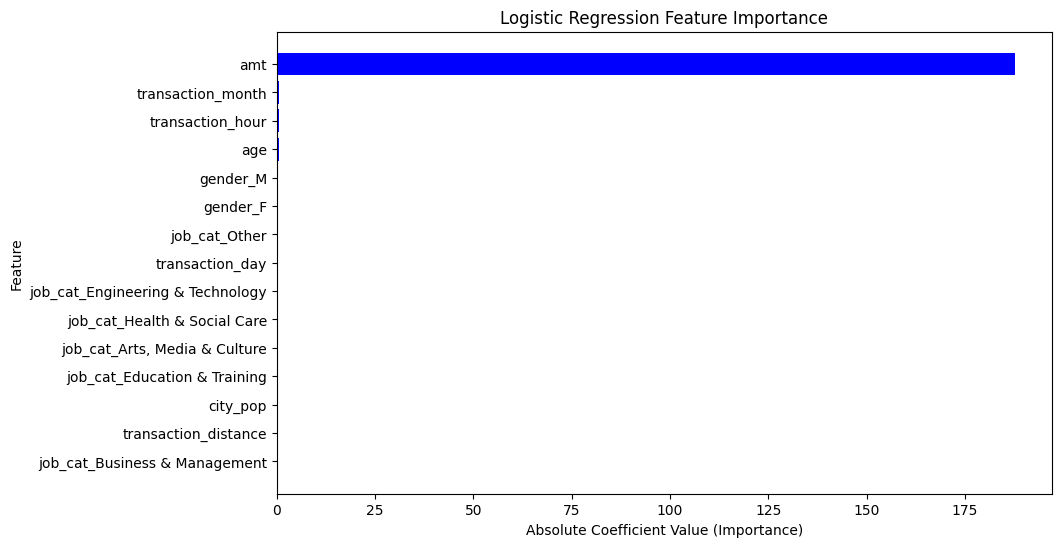

In [ ]:
# Feature Importance for Logistic Regression
import pandas as pd
import numpy as np

# Assuming the model has already been trained with model.fit(X, y)
coefficients = model.coef_[0]  # Extract coefficients from logistic regression
feature_importance_lr = pd.DataFrame({
    'Feature': X.columns,                      # Feature names
    'Coefficient': coefficients,               # Coefficients (log-odds)
    'Importance': np.abs(coefficients)         # Absolute value for ranking
}).sort_values(by='Importance', ascending=False)  # Sort by importance

# Display feature importance
print("\nFeature Importance (Logistic Regression):")
print(feature_importance_lr)

# Optionally, visualize the feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_lr['Feature'], feature_importance_lr['Importance'], color='blue')
plt.xlabel('Absolute Coefficient Value (Importance)')
plt.ylabel('Feature')
plt.title('Logistic Regression Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()


# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_validate, StratifiedKFold
import numpy as np

print("\nTarget variable distribution:")
print(train_data['is_fraud'].value_counts(normalize=True))

# Prepare data
X = train_data.drop(columns=['is_fraud', 'merchant', 'trans_date_trans_time', 'category', 'first', 'last',
                             'street', 'city', 'state', 'zip', 'job', 'unix_time', 'trans_num', 'dob','transaction_distance',
                             'cc_num'])
y = train_data['is_fraud']
print(X)
# Define the model
model_rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_results_rf = cross_validate(model_rf, X, y, cv=cv, scoring=['accuracy', 'roc_auc'], return_train_score=True)

# Print cross-validation results
print("\nCross-Validation Results for Random Forest:")
print(f"Accuracy: {np.mean(cv_results_rf['test_accuracy']):.4f} ± {np.std(cv_results_rf['test_accuracy']):.4f}")
print(f"ROC-AUC: {np.mean(cv_results_rf['test_roc_auc']):.4f} ± {np.std(cv_results_rf['test_roc_auc']):.4f}")

# Train on the entire training set and evaluate on the test set
model_rf.fit(X, y)

X_test = test_data.drop(columns=['is_fraud', 'merchant', 'trans_date_trans_time', 'category', 'first', 'last',
                                 'street', 'city', 'state', 'zip', 'job', 'unix_time', 'trans_num', 'dob','transaction_distance',
                                 'cc_num'])
y_test = test_data['is_fraud']

y_pred_probs_rf = model_rf.predict_proba(X_test)[:, 1]  # Probabilities for fraud
y_pred_rf = model_rf.predict(X_test)

# Confusion Matrix
print("\nConfusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

# Classification Report
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# ROC-AUC Score
roc_auc_rf = roc_auc_score(y_test, y_pred_probs_rf)
print(f"ROC-AUC Score on Test Data for Random Forest: {roc_auc_rf:.4f}")



Target variable distribution:
is_fraud
0    0.994211
1    0.005789
Name: proportion, dtype: float64
              amt       lat      long  city_pop  merch_lat  merch_long  \
0        0.000137  0.343968  0.864638  0.001194   0.350302    0.848602   
1        0.003670  0.618450  0.485682  0.000043   0.621488    0.486208   
2        0.007569  0.474727  0.546553  0.001421   0.497559    0.546697   
3        0.001520  0.561509  0.548070  0.000659   0.577663    0.542619   
4        0.001415  0.394153  0.882190  0.000026   0.405244    0.882857   
...           ...       ...       ...       ...        ...         ...   
1296670  0.000503  0.379084  0.544346  0.000081   0.367421    0.551347   
1296671  0.001751  0.412281  0.902174  0.000026   0.410026    0.886727   
1296672  0.003625  0.276699  0.612486  0.000301   0.300969    0.617133   
1296673  0.002553  0.499837  0.646029  0.000379   0.490098    0.636080   
1296674  0.000114  0.553210  0.530050  0.000067   0.568003    0.526323   

          

In [ ]:
# Build the neural network
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC()])

# Train the model
history = model.fit(
    X, y,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=64,
    class_weight={0: 1, 1: 5},  # Adjust for class imbalance
    verbose=1
)

# Evaluate the model
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Print evaluation metrics
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_probs)
print(f"ROC-AUC Score on Test Data: {roc_auc:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
20261/20261 ━━━━━━━━━━━━━━━━━━━━ 107s 5ms/step - accuracy: 0.9932 - auc_3: 0.6883 - loss: 0.1207 - val_accuracy: 0.9961 - val_auc_3: 0.8787 - val_loss: 0.0166
Epoch 2/20
20261/20261 ━━━━━━━━━━━━━━━━━━━━ 70s 3ms/step - accuracy: 0.9935 - auc_3: 0.8909 - loss: 0.0779 - val_accuracy: 0.9959 - val_auc_3: 0.9068 - val_loss: 0.0214
Epoch 3/20
20261/20261 ━━━━━━━━━━━━━━━━━━━━ 70s 3ms/step - accuracy: 0.9937 - auc_3: 0.9042 - loss: 0.0744 - val_accuracy: 0.9962 - val_auc_3: 0.9206 - val_loss: 0.0190
Epoch 4/20
20261/20261 ━━━━━━━━━━━━━━━━━━━━ 80s 3ms/step - accuracy: 0.9935 - auc_3: 0.9076 - loss: 0.0717 - val_accuracy: 0.9954 - val_auc_3: 0.9215 - val_loss: 0.0202
Epoch 5/20
20261/20261 ━━━━━━━━━━━━━━━━━━━━ 71s 3ms/step - accuracy: 0.9937 - auc_3: 0.9174 - loss: 0.0686 - val_accuracy: 0.9962 - val_auc_3: 0.9065 - val_loss: 0.0176
Epoch 6/20
20261/20261 ━━━━━━━━━━━━━━━━━━━━ 92s 4ms/step - accuracy: 0.9932 - auc_3: 0.9133 - loss: 0.0701 - val_accuracy: 0.9955 - val_auc_3: 0.9288 - va

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_validate, StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
import numpy as np

X = train_data.drop(columns=['is_fraud', 'merchant', 'trans_date_trans_time', 'category', 'first', 'last',
                             'street', 'city', 'state', 'zip', 'job', 'unix_time', 'trans_num', 'dob','transaction_distance',
                             'cc_num'])
y = train_data['is_fraud']

X_test = test_data.drop(columns=['is_fraud', 'merchant', 'trans_date_trans_time', 'category', 'first', 'last',
                                 'street', 'city', 'state', 'zip', 'job', 'unix_time', 'trans_num', 'dob','transaction_distance',
                                 'cc_num'])
y_test = test_data['is_fraud']

# Build the neural network
model = Sequential([
    Dense(8, activation='relu', input_dim=X.shape[1]),
    Dropout(0.3),
    Dense(4, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC()])

# Train the model
history = model.fit(
    X, y,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=64,
    class_weight={0: 1, 1: 10},  # Adjust for class imbalance
    verbose=1
)

# Evaluate the model
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.8).astype(int)

# Print evaluation metrics
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_probs)
print(f"ROC-AUC Score on Test Data: {roc_auc:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
20261/20261 ━━━━━━━━━━━━━━━━━━━━ 73s 3ms/step - accuracy: 0.9891 - auc_1: 0.5028 - loss: 0.3166 - val_accuracy: 0.9961 - val_auc_1: 0.5000 - val_loss: 0.0694
Epoch 2/20
20261/20261 ━━━━━━━━━━━━━━━━━━━━ 76s 3ms/step - accuracy: 0.9943 - auc_1: 0.4925 - loss: 0.2207 - val_accuracy: 0.9961 - val_auc_1: 0.5000 - val_loss: 0.0684
Epoch 3/20
20261/20261 ━━━━━━━━━━━━━━━━━━━━ 66s 3ms/step - accuracy: 0.9941 - auc_1: 0.5048 - loss: 0.2267 - val_accuracy: 0.9961 - val_auc_1: 0.5000 - val_loss: 0.0659
Epoch 4/20
20261/20261 ━━━━━━━━━━━━━━━━━━━━ 65s 3ms/step - accuracy: 0.9942 - auc_1: 0.4974 - loss: 0.2237 - val_accuracy: 0.9961 - val_auc_1: 0.5000 - val_loss: 0.0694
Epoch 5/20
20261/20261 ━━━━━━━━━━━━━━━━━━━━ 65s 3ms/step - accuracy: 0.9941 - auc_1: 0.4987 - loss: 0.2261 - val_accuracy: 0.9961 - val_auc_1: 0.5000 - val_loss: 0.0666
Epoch 6/20
20261/20261 ━━━━━━━━━━━━━━━━━━━━ 70s 3ms/step - accuracy: 0.9940 - auc_1: 0.4993 - loss: 0.2288 - val_accuracy: 0.9961 - val_auc_1: 0.5000 - val

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

ROC-AUC Score on Test Data: 0.5000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
